# Individual Pathway

Applications that were used: Cytoscape (v.3.8.2) and Jupyter Notebooks (v.2.2.6) through the Anaconda navigator (v.1.10.0).

In Cytoscape, the following app was installed: FileTransfer (v.1.1) for communication to Jupyter notebooks. 
To install apps in Cytoscape go to Apps -> App Manager -> Search

For those new to working with Jupyter Notebooks, go to the [MarkDown Tutorial](https://www.markdowntutorial.com/lesson/1/) to learn how to comment your code properly. 

Now let's move on to the code. 

#### Here we will walk through loading a pathway, adding data, adding expression and significance visualizations and finally exporting the result to an image. 

## Step 1a: Importing Required Packages

In [1]:
import os
import sys
import requests
import pandas as pd
import py4cytoscape as p4c
from lxml import etree as ET

## Step 1b: Load code that prevents unwanted logging error

In [2]:
from logging import getLogger, INFO
from concurrent_log_handler import ConcurrentRotatingFileHandler

In [3]:
log = getLogger()
# Use an absolute path to prevent file rotation trouble.
logfile = os.path.abspath("py4cytoscape.log")
# Rotate log after reaching 512K, keep 5 old copies.
rotateHandler = ConcurrentRotatingFileHandler(logfile, "a", 512*1024, 5)
log.addHandler(rotateHandler)
log.setLevel(INFO)

log.info("Here is a very exciting log message, just for you")

Check py4cytoscape version

In [4]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.2.0',
 'py4cytoscapeVersion': '0.0.9'}

# Step 2: Load a pathway from WikiPathways

You can change the WP_ID variable to a desired WikiPathways ID. Note we use the 'import-as-pathway' option. 

In [22]:
#Defining wikipathway IDs: WP5036, WP5095, WP2725, WP4756
WP_ID = 'WP4756'

In [23]:
cmd_list = ['wikipathways','import-as-pathway','id="', WP_ID,'"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

## Step 3: Add data

Now we will add expression data from a file. Change the file location and name to select your own file. 

In [17]:
path = 'C:/Users/stefa/Documents/GitHub/2021-internship/Raats/'

In [18]:
expression_file = path + 'expDatafile.csv'
df=pd.read_csv(expression_file)
df.head()

,Unnamed: 0,logFC,logCPM,F,PValue,FDR
0,SAA2,2.414265,5.432500,512.091071,1.406545e-12,1.877738e-08
1,CCL20,3.133684,4.949061,447.918174,3.560546e-12,2.376665e-08
2,IL36G,2.722310,4.359048,340.454929,2.359692e-11,1.050063e-07
3,INHBA,1.810556,6.511435,272.793242,1.071872e-10,3.577374e-07
4,TNFAIP3,1.601914,7.418585,263.426641,1.358966e-10,3.628440e-07


Now we define what column the data will be linked to. We want the row with gene A and the corresponding values to be added in the row of gene A in the pathway. In the dataset, the first column with gene names is called "Unnamed:0". Consequently, we select this column in the following code.     

Note this gives a SettingWithCopyWarning, this is okay. 

In [24]:
p4c.load_table_data(df, data_key_column="Unnamed: 0")

C:\Users\stefa\anaconda3\lib\site-packages\py4cytoscape\tables.py:474: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


'Success: Data loaded in defaultnode table'

## Step 3: Adding expression and significance visualizations

First we will add expression data to our nodes. Expression data is under the column "logFC" in our dataset. We assign a white colour to values close to 0, a blue colour to values of -1 or less, and a red colour to values of 1 or greater. We apply this mapping to the style 'WikiPathways'. Leave this blank to update the default style. 

In [25]:
p4c.set_node_color_mapping('logFC', table_column_values=[-1, 0,  1], colors=['#0000FF', '#FFFFFF', '#FF0000'], style_name='WikiPathways')

''

Now we will assign a light green border colour to all genes that are significantly upregulated or downregulated. To do this, we make a list of the genes, which we pass to the color bypass code. The column 'PValue' is the column in our dataset where significance is annotated.   

Finally, to make it easier to view, we increase the border width size. Note that it is not necessary to include the style name when using the bypass option.     

Also note there is a Cytoscape warning, that is okay. 

In [26]:
sig_gene_list = p4c.create_column_filter('sig_gene_list','PValue', 0.05, "LESS_THAN")
dfSigGene = pd.DataFrame(sig_gene_list)
col_one_list = dfSigGene['nodes'].tolist()
print(f"\ncol_one_list:\n{col_one_list}\ntype:{type(col_one_list)}")

Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.

col_one_list:
['CAMK2D', 'ATF4', 'ITPR1', 'CALML3', 'ITPR3']
type:<class 'list'>


In [27]:
p4c.set_node_border_color_bypass(col_one_list,'#90ee90')
p4c.set_node_border_width_bypass(col_one_list, 10)

''

## Step 4: Exporting images  

Now we will make a PNG image from cytoscape, to view in Jupyter. We also make a SVG file, to use for later.   

Vector based SVG files handle scaling up or down much better than pixel based images such as PNGs. 

This file already exists. A Cytoscape popup will be generated to confirm overwrite.
This file already exists. A Cytoscape popup will be generated to confirm overwrite.


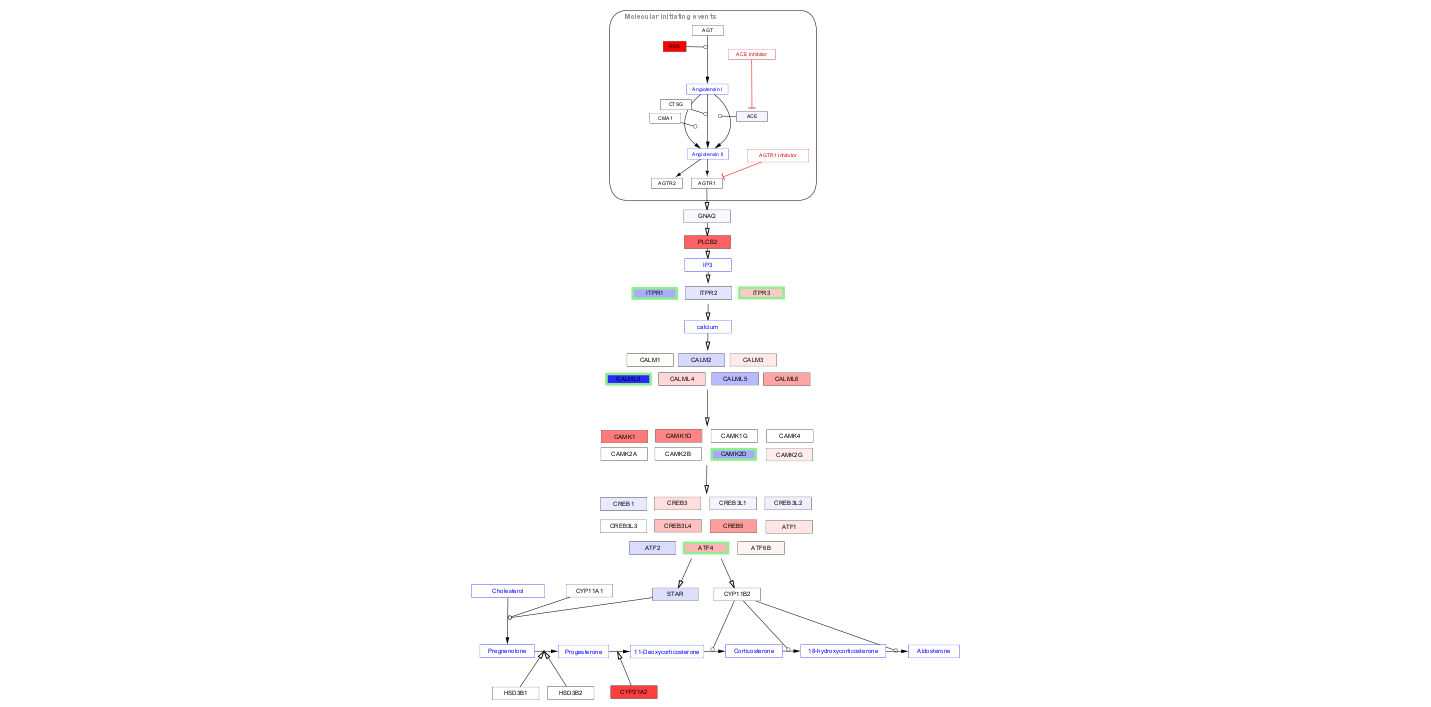

In [29]:
p4c.export_image(filename='pathway4756.png')
p4c.sandbox_get_from('pathway4756.png')
from IPython.display import Image

p4c.export_image(filename='pathway4756.svg', type='SVG')
p4c.sandbox_get_from('pathway4756.svg')

Image('pathway4756.png')
